In [1]:
import zipfile, os
local_zip = 'new-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/new-dataset-extract')
zip_ref.close()

base_dir = '/new-dataset-extract/new-dataset/'

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(
                      rescale=1./255,
                      # rotation_range=20,
                      # horizontal_flip=True,
                      # vertical_flip=True,
                      zoom_range = 0.1,
                      brightness_range=(0.5, 1),
                      # shear_range = 0.2,
                      fill_mode = 'constant',
                      validation_split=0.3)

In [3]:
train_generator = image_generator.flow_from_directory(
                              base_dir,
                              target_size=(100, 100),
                              shuffle=True,
                              subset='training')
validation_generator = image_generator.flow_from_directory(
                              base_dir,
                              target_size=(100, 100),
                              shuffle=True,
                              subset='validation')

Found 72 images belonging to 18 classes.
Found 18 images belonging to 18 classes.


In [4]:
print(train_generator)

In [8]:
train_generator.class_indices

{'Ari': 0,
 'Bobby': 1,
 'Bram': 2,
 'Budi': 3,
 'Cecil': 4,
 'Charqui': 5,
 'Christian': 6,
 'Ernest': 7,
 'Joni': 8,
 'Koen': 9,
 'Maya': 10,
 'Michael': 11,
 'Ramod': 12,
 'Rino': 13,
 'Sri': 14,
 'Ujang': 15,
 'Valen': 16,
 'Zuxen': 17}

In [9]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(18, activation='softmax')
])

# Ada beberapa jenis arsitektur CNN lain yang kami coba

# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(32, (5,5), activation='relu', input_shape=(100, 100, 3)),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     tf.keras.layers.Conv2D(64, (5,5), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Conv2D(128, (5,5), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Conv2D(128, (5,5), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(512, activation='relu'),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(18, activation='softmax')
# ])


# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     # tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(512, activation='relu'),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(18, activation='softmax')
# ])

# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(32, (5,5), activation='relu', input_shape=(100, 100, 3)),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     tf.keras.layers.Conv2D(64, (5,5), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Conv2D(128, (5,5), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     # tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(512, activation='relu'),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(18, activation='softmax')
# ])

# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     # tf.keras.layers.MaxPooling2D(2,2),
#     # tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     # tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(512, activation='relu'),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(18, activation='softmax')
# ])

# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(32, (5,5), activation='relu', input_shape=(100, 100, 3)),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     tf.keras.layers.Conv2D(64, (5,5), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     # tf.keras.layers.MaxPooling2D(2,2),
#     # tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     # tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(512, activation='relu'),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(18, activation='softmax')
# ])


# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     # tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     # tf.keras.layers.MaxPooling2D(2,2),
#     # tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     # tf.keras.layers.MaxPooling2D(2,2),
#     # tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     # tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(512, activation='relu'),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(18, activation='softmax')
# ])

# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(32, (5,5), activation='relu', input_shape=(100, 100, 3)),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     # tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     # tf.keras.layers.MaxPooling2D(2,2),
#     # tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     # tf.keras.layers.MaxPooling2D(2,2),
#     # tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     # tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(512, activation='relu'),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(18, activation='softmax')
# ])

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Nadam(),
              metrics=['accuracy'])

In [11]:
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=5)

In [12]:
history = model.fit(
      train_generator,
      batch_size=1,
      epochs=30,
      validation_data=validation_generator, 
      verbose=2)

Epoch 1/30
3/3 - 5s - loss: 2.9233 - accuracy: 0.0278 - val_loss: 2.8859 - val_accuracy: 0.0556
Epoch 2/30
3/3 - 1s - loss: 2.9103 - accuracy: 0.0417 - val_loss: 2.8818 - val_accuracy: 0.1111
Epoch 3/30
3/3 - 1s - loss: 2.8840 - accuracy: 0.0694 - val_loss: 2.8531 - val_accuracy: 0.0556
Epoch 4/30
3/3 - 1s - loss: 3.5786 - accuracy: 0.0556 - val_loss: 2.8660 - val_accuracy: 0.1111
Epoch 5/30
3/3 - 1s - loss: 2.8655 - accuracy: 0.2083 - val_loss: 2.8536 - val_accuracy: 0.1667
Epoch 6/30
3/3 - 1s - loss: 2.8455 - accuracy: 0.1944 - val_loss: 2.8269 - val_accuracy: 0.0556
Epoch 7/30
3/3 - 1s - loss: 2.7987 - accuracy: 0.1806 - val_loss: 2.6990 - val_accuracy: 0.1667
Epoch 8/30
3/3 - 1s - loss: 2.7315 - accuracy: 0.0833 - val_loss: 2.6516 - val_accuracy: 0.1667
Epoch 9/30
3/3 - 1s - loss: 2.6341 - accuracy: 0.1944 - val_loss: 2.4943 - val_accuracy: 0.2222
Epoch 10/30
3/3 - 1s - loss: 2.3493 - accuracy: 0.3194 - val_loss: 2.2810 - val_accuracy: 0.2222
Epoch 11/30
3/3 - 1s - loss: 2.2720 - a

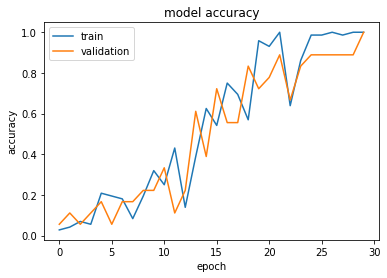

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

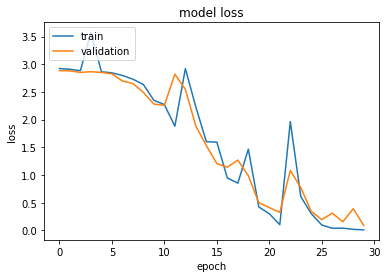

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Saving NFI-00103001.png to NFI-00103001.png
NFI-00103001.png
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
3


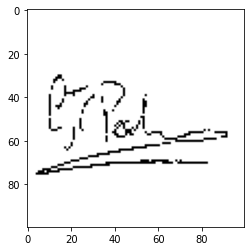

In [15]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline
 
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(100,100))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images)
  result = np.argmax(classes)

  print(fn)
  print(classes)
  print(result)

# Untuk mempermudah pengecekan hasil dari pencocokan kita gunakan bantuan daftar dibawah

#  'Ari': 0,
#  'Bobby': 1,
#  'Bram': 2,
#  'Budi': 3,
#  'Cecil': 4,
#  'Charqui': 5,
#  'Christian': 6,
#  'Ernest': 7,
#  'Joni': 8,
#  'Koen': 9,
#  'Maya': 10,
#  'Michael': 11,
#  'Ramod': 12,
#  'Rino': 13,
#  'Sri': 14,
#  'Ujang': 15,
#  'Valen': 16,
#  'Zuxen': 17
  

In [16]:
model.save_weights('./checkpoints/my_checkpoint')